In [11]:
import pickle
from pprint import pprint
import pandas as pd

In [12]:
with open("D:/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         DATE  STAR                                             REVIEW  LIKE
0  2020-01-07     1          오류 자체 오류 이용 자수 결제 툭하면 점검 충전 체크카드 출금 충전 금액     0
1  2020-01-07     5                          국굿 아이폰 바코드 큐알 코드 결제 가능 최고     0
2  2020-01-07     3                           현상 사용 오늘 업데이트 접속 화면 바탕화면     0
3  2020-01-07     2        설치 아이폰 설치 아버지 설치 갤럭시 노트 부산 지역화폐 설치 사용 버전 설치     0
4  2020-01-07     4  개선 사항 요청 본인 인증 수단 공인 인증서 추가 어머니 발급 어머니 핸드폰 명의 ...     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2266 non-null   object
 1   STAR    2266 non-null   int64 
 2   REVIEW  2266 non-null   object
 3   LIKE    2266 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 70.9+ KB
None


In [13]:
##Date column을 pandas.Datetime으로 변환
data['DATE'] = pd.to_datetime(data['DATE'])
# Date column을 index로 설정
data = data.set_index("DATE")



In [14]:
data.tail()

,STAR,REVIEW,LIKE
DATE,,,
2021-07-21,1,로코 정책 원금 사용 정책 원금 이벤트 적립금 방법 설정 결제 사람 정책 원금 카드...,0
2021-07-21,5,삼성 페이 연동,0
2021-07-21,3,업데이트 설정 데이터 삭제,0
2021-07-22,1,로코 이벤트 사용 조건 충전 전액 사용 이후 카드 캐시 자동 충전 그냥 쓰레기 정책...,1
2021-07-23,4,부산 사용,0


In [15]:
## 4월을 기준으로 나누기
before_4 = data['2019-12-27' : '2021-03-31']
after_4 = data['2021-04-01': '2021-7-23']

In [16]:
# 확인해보기
print(before_4.info())
print(after_4.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2020-01-07 to 2021-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STAR    1306 non-null   int64 
 1   REVIEW  1306 non-null   object
 2   LIKE    1306 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 960 entries, 2021-04-01 to 2021-07-23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STAR    960 non-null    int64 
 1   REVIEW  960 non-null    object
 2   LIKE    960 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 30.0+ KB
None


In [17]:
## 나눈 시점부터 리뷰 가져오기
slice0 = [review for review in list(before_4['REVIEW'])]
slice1 = [review for review in list(after_4['REVIEW'])]

In [18]:
# 확인해보기
print(slice0[:5])
print(slice1[:5])

['오류 자체 오류 이용 자수 결제 툭하면 점검 충전 체크카드 출금 충전 금액', '국굿 아이폰 바코드 큐알 코드 결제 가능 최고', '현상 사용 오늘 업데이트 접속 화면 바탕화면', '설치 아이폰 설치 아버지 설치 갤럭시 노트 부산 지역화폐 설치 사용 버전 설치', '개선 사항 요청 본인 인증 수단 공인 인증서 추가 어머니 발급 어머니 핸드폰 명의 사용 어머니 발급']
['도성', '카드', '오픈', '서비스 부탁', '잔액 대박 응원 주주']


## 4월 이전 리뷰분석

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = slice0
tfidf = TfidfVectorizer(max_features=1000)
tdm = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()
dense = tdm.todense()
lst1 = dense.tolist()

In [20]:
word_count = pd.DataFrame(lst1,columns = feature_names)
word_count.T.sum(axis=1)

가게       4.546613
가격       0.428517
가계       1.803546
가끔       3.995182
가능       2.761407
           ...   
후기       0.703636
후불       0.403096
후짐       0.572982
휴대폰      7.015063
휴대폰번호    1.097740
Length: 1000, dtype: float64

In [24]:
from wordcloud import WordCloud ,ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image

In [25]:
wc = pd.DataFrame({'단어': tfidf.get_feature_names(), 
                    '빈도': tdm.sum(axis=0).flat})

In [26]:
wc.sort_values('빈도', ascending=False).head(10)

,단어,빈도
421,사용,114.334930
507,업데이트,56.188169
671,접속,49.861393
831,카드,46.878123
820,충전,44.837885
522,오류,38.617131
839,캐시,35.339529
805,최고,34.955803
482,실행,34.344664
64,결제,32.880613


In [34]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(0,10),np.random.randint(50,70),np.random.randint(40,60)))

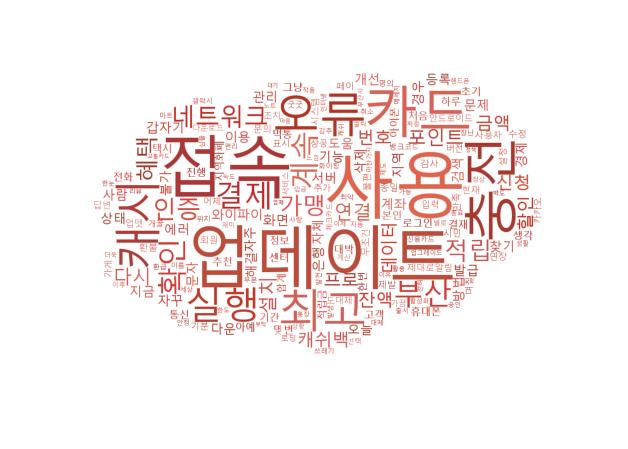

In [36]:
from wordcloud import WordCloud

wc = word_count.T.sum(axis=1)
custom_mask = np.array(Image.open("D:/연구알바/cloud.png"))

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.1,
                      #stopwords=STOPWORDS,
                      mask = custom_mask,
                      color_func = color_func,
                     
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- 참고 : https://www.python2.net/questions-683517.htm

## 4월 이후 리뷰분석

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = slice1
tfidf = TfidfVectorizer(max_features=1000)
tdm = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()
dense = tdm.todense()
lst1 = dense.tolist()

In [38]:
word_count = pd.DataFrame(lst1,columns = feature_names)
word_count.T.sum(axis=1)

가게     1.624569
가격     0.247111
가계부    0.253866
가기     1.025281
가까이    0.211031
         ...   
후불     1.248527
후코     0.646379
훤히     0.273629
훨신     0.666673
휴대폰    0.713146
Length: 1000, dtype: float64

In [39]:
wc = pd.DataFrame({'단어': tfidf.get_feature_names(), 
                    '빈도': tdm.sum(axis=0).flat})

In [40]:
wc.sort_values('빈도', ascending=False).head(10)

,단어,빈도
809,카드,88.706788
373,사용,66.767068
295,발급,40.321120
173,기존,40.056108
161,금액,30.194670
815,캐시,29.938143
536,이전,28.906025
873,페이,28.700968
801,충전,28.240855
245,등록,25.047161


In [43]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(225,240),np.random.randint(50,70),np.random.randint(40,60)))

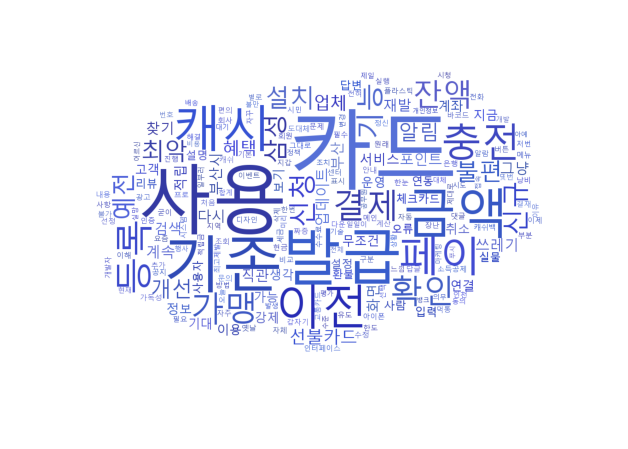

In [46]:
from wordcloud import WordCloud

wc = word_count.T.sum(axis=1)
custom_mask = np.array(Image.open("D:/연구알바/cloud.png"))
# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.5,
                      #stopwords=STOPWORDS,
                        mask = custom_mask,
                      color_func = color_func,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()